In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = sns.load_dataset('titanic')

# Select features and target variable
x = df[['age', 'fare', 'sex']]
y = df['survived']

# Fill missing values
x['age'].fillna(value=x['age'].mean(), inplace=True)
x['fare'].fillna(value=x['fare'].mean(), inplace=True)

# Convert categorical variable into dummy/indicator variables
x = pd.get_dummies(x, columns=['sex'], drop_first=True)

# Remove outliers in 'age'
q1_age = x['age'].quantile(0.25)
q3_age = x['age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age
x = x[(x['age'] > lower_bound_age) & (x['age'] < upper_bound_age)]

# Remove outliers in 'fare'
q1_fare = x['fare'].quantile(0.25)
q3_fare = x['fare'].quantile(0.75)
iqr_fare = q3_fare - q1_fare
lower_bound_fare = q1_fare - 1.5 * iqr_fare
upper_bound_fare = q3_fare + 1.5 * iqr_fare
x = x[(x['fare'] > lower_bound_fare) & (x['fare'] < upper_bound_fare)]

# Ensure y matches the cleaned x
y = y.loc[x.index]

# Normalize the data
cols_to_normalize = ['fare', 'age']
scaler = MinMaxScaler()
x[cols_to_normalize] = scaler.fit_transform(x[cols_to_normalize])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier()
param_grid = {
    
    'class_weight': [None],
    'criterion': ['gini'],
    'max_depth': [None],
    'max_features': [None],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'min_weight_fraction_leaf': [0.0],
    'random_state': [None],
    'splitter': ['best']
}
search = GridSearchCV(model,prams,cv = 5,scoring='precision')
search.fit(x_train, y_train)

# Make predictions
y_pred = search.predict(x_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print('best perameter is: ',search.best_params_)
print('best score is',search.best_score_)


Precision: 0.59
Recall: 0.73
F1 Score: 0.65
best perameter is:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None}
best score is 0.6179088125736552


C:\Users\dell\AppData\Local\Temp\ipykernel_3320\2432969851.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['age'].fillna(value=x['age'].mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_3320\2432969851.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age'].fillna(value=x['age'].mean(), inplace=True)
C:\Users\dell\A

C:\Users\dell\AppData\Local\Temp\ipykernel_3320\3659655424.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['age'].fillna(value=x['age'].mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_3320\3659655424.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age'].fillna(value=x['age'].mean(), inplace=True)
C:\Users\dell\A

ValueError: Invalid parameter 'algorithm' for estimator RandomForestClassifier(). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

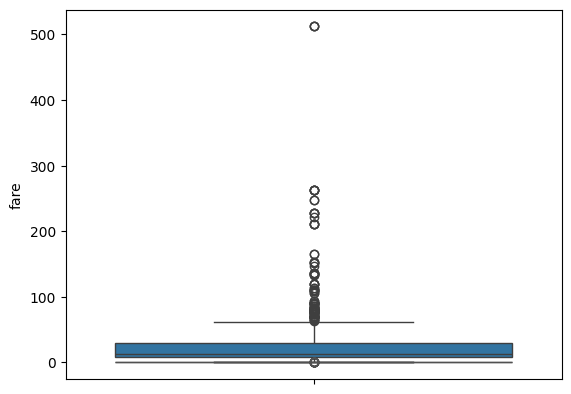

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = sns.load_dataset('titanic')

# Select features and target variable
x = df[['age', 'fare', 'sex']]
y = df['survived']

# Fill missing values
x['age'].fillna(value=x['age'].mean(), inplace=True)
x['fare'].fillna(value=x['fare'].mean(), inplace=True)

# Convert categorical variable into dummy/indicator variables
x = pd.get_dummies(x, columns=['sex'], drop_first=True)

# Remove outliers in 'age'
q1_age = x['age'].quantile(0.25)
q3_age = x['age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age
x = x[(x['age'] > lower_bound_age) & (x['age'] < upper_bound_age)]

sns.boxplot(data = x, y = 'fare')

# Remove outliers in 'fare'
q1_fare = x['fare'].quantile(0.25)
q3_fare = x['fare'].quantile(0.75)
iqr_fare = q3_fare - q1_fare
lower_bound_fare = q1_fare - 1.5 * iqr_fare
upper_bound_fare = q3_fare + 1.5 * iqr_fare
x = x[(x['fare'] > lower_bound_fare) & (x['fare'] < upper_bound_fare)]

# Ensure y matches the cleaned x
y = y.loc[x.index]

# Normalize the data
cols_to_normalize = ['fare', 'age']
scaler = MinMaxScaler()
x[cols_to_normalize] = scaler.fit_transform(x[cols_to_normalize])

sns.boxplot(data = x , y='fare')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Train a Decision Tree model
model = RandomForestClassifier()
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False
 }
search = GridSearchCV(model,prams,cv = 5,scoring='precision')
search.fit(x_train, y_train)

# Make predictions
y_pred = search.predict(x_test)


print('best perameter is: ',search.best_params_)
print('best score is',search.best_score_)


C:\Users\dell\AppData\Local\Temp\ipykernel_3320\1237315781.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['age'].fillna(value=x['age'].mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_3320\1237315781.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age'].fillna(value=x['age'].mean(), inplace=True)
C:\Users\dell\A

precision score is:  0.673469387755102
recall score is :  0.6470588235294118
best perameter is:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
best score is 0.6333333333333333


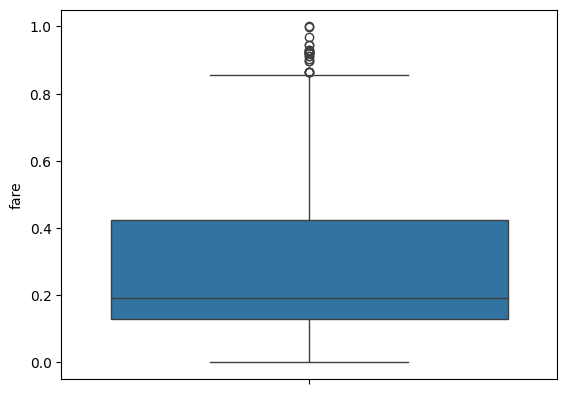

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = sns.load_dataset('titanic')

# Select features and target variable
x = df[['age', 'fare', 'sex']]
y = df['survived']

# Fill missing values
x['age'].fillna(value=x['age'].mean(), inplace=True)
x['fare'].fillna(value=x['fare'].mean(), inplace=True)

# Convert categorical variable into dummy/indicator variables
x = pd.get_dummies(x, columns=['sex'], drop_first=True)

# Remove outliers in 'age'
q1_age = x['age'].quantile(0.25)
q3_age = x['age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age
x = x[(x['age'] > lower_bound_age) & (x['age'] < upper_bound_age)]

# Remove outliers in 'fare'
q1_fare = x['fare'].quantile(0.25)
q3_fare = x['fare'].quantile(0.75)
iqr_fare = q3_fare - q1_fare
lower_bound_fare = q1_fare - 1.5 * iqr_fare
upper_bound_fare = q3_fare + 1.5 * iqr_fare
x = x[(x['fare'] > lower_bound_fare) & (x['fare'] < upper_bound_fare)]

# Ensure y matches the cleaned x
y = y.loc[x.index]

# Normalize the data
cols_to_normalize = ['fare', 'age']
scaler = MinMaxScaler()
x[cols_to_normalize] = scaler.fit_transform(x[cols_to_normalize])


sns.boxplot(data = x, y = 'fare')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Train a Decision Tree model
model = KNeighborsClassifier()
prams = {'algorithm': ['auto'],
 'leaf_size': [30],
 'metric': ['minkowski'],
 'metric_params': [None],
 'n_jobs': [None],
 'n_neighbors': [5,14,3,5,6,7],
 'p': [2],
 'weights': ['uniform']
 }
search = GridSearchCV(model,prams,cv = 5,scoring='recall')
search.fit(x_train, y_train)

# Make predictions
y_pred = search.predict(x_test)
print("precision score is: ", precision_score(y_pred,y_test))
print("recall score is : ", recall_score(y_pred,y_test))


print('best perameter is: ',search.best_params_)
print('best score is',search.best_score_)


In [36]:
model = KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}